# Important Imports

In [ ]:
# This file is used for both, nutshell (Coarse-grained) and detailed (Fine-grained) creation of the questions and their numbers

In [15]:
import json
import os
from math import comb
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.min_rows = 25

In [16]:
# Count Solutions combinations from n_choices
def count_solutions(n_choices):
    n_solutions = 0
    for i in range(1, n_choices + 1):
        n_solutions += comb(n_choices, i)
    return n_solutions


count_solutions(7)

127

# Parsing JSON File

## Fall 20 and Spring 21

In [20]:
# Create DF that tells the type of each question, and how many questions in it. 
json_files = [file for file in os.listdir("PI_Frames_20_21")][1:]  # 96 #[1:] because of the ".ipynb_checkpoints" folder.

listt1 = []
try:
    for filename in json_files:
        f = open("PI_Frames_20_21/" + filename, encoding="utf8")
        data = json.load(f)
        count=0
        for questionName in data["translations"]["en"]:
            if questionName in ["text11","fa1"]:  # Skip NonQuestions
                continue

            n_choices = len(data["translations"]["en"][questionName]["choices"])  # Get Number of Choices
            QuestionType = data["translations"]["en"][questionName]["type"]  # Get Type of the Questions

            if QuestionType == "multiple" and data["translations"]["en"][questionName]["answer"] in ["True", "False"]:  # Multiple but contains T/F
                QuestionType = "T/F"
                n_solutions, n_choices = 2, 2
            elif QuestionType == "multiple":
                QuestionType = "Single-Choice"
                n_solutions = n_choices
            elif QuestionType == "select":
                QuestionType = "Multi-Choice"
                n_solutions = count_solutions(n_choices)
            elif QuestionType in ["true/false", "T/F"]:  # T/F but not named multiple
                QuestionType = "T/F"
                n_solutions, n_choices = 2, 2
            else:
                print("ERROR!!!")

            listt1.append([filename[:-5], count, QuestionType, n_choices, n_solutions])
            
            count+=1
        f.close()

except Exception as inst:
    print([filename[:-5], questionName, QuestionType, n_choices, n_solutions])
    f.close()

 

In [21]:
frameset_questions_detailed_20_21 = pd.DataFrame(listt1,columns=["frameset_name", "question_name", "question_type", "n_choices", "n_solutions",])
frameset_questions_detailed_20_21.to_csv("frameset_questions_detailed_20_21.csv") 


frameset_questions_nutshell_20_21 = frameset_questions_detailed_20_21.groupby(["frameset_name"], as_index=False).agg(
    n_questions=("frameset_name", "count"),
)

## Spring 22 (Adding Count to Frameset_Questions_Coarse_Grained)

In [ ]:
json_files = [file for file in os.listdir("./Spring_22/PI_Frames_22")][1:]  # 96 #[1:] because of the ".ipynb_checkpoints" folder.

listt2 = []
try:
    for filename in json_files:
        f = open("./Spring_22/PI_Frames_22/" + filename, encoding="utf8")
        data = json.load(f)
        count=0
        for questionName in data["translations"]["en"]:
            if questionName in ["text11","fa1"]:  # Skip NonQuestions
                continue

            n_choices = len(data["translations"]["en"][questionName]["choices"])  # Get Number of Choices
            QuestionType = data["translations"]["en"][questionName]["type"]  # Get Type of the Questions

            if QuestionType == "multiple" and data["translations"]["en"][questionName]["answer"] in ["True", "False"]:  # Multiple but contains T/F
                QuestionType = "T/F"
                n_solutions, n_choices = 2, 2
            elif QuestionType == "multiple":
                QuestionType = "Single-Choice"
                n_solutions = n_choices
            elif QuestionType == "select":
                QuestionType = "Multi-Choice"
                n_solutions = count_solutions(n_choices)
            elif QuestionType in ["true/false", "T/F"]:  # T/F but not named multiple
                QuestionType = "T/F"
                n_solutions, n_choices = 2, 2
            else:
                print("ERROR!!!")

            listt2.append([filename[:-5], count, QuestionType, n_choices, n_solutions])
            
            count+=1
        f.close()

except Exception as inst:
    print([filename[:-5], questionName, QuestionType, n_choices, n_solutions])
    f.close()




In [6]:
frameset_questions_detailed_22 = pd.DataFrame(listt2,columns=["frameset_name", "question_name", "question_type", "n_choices", "n_solutions",])

frameset_questions_nutshell_22 = frameset_questions_detailed_22.groupby(["frameset_name"], as_index=False).agg(
    n_questions_22=("frameset_name", "count"),
)

# Adding Number of Questions to Frameset_Questions_Coarse_Grained.csV 

In [25]:
# Adding the nuthsell # of questions to the main CSV we have which is Frameset_Questions_Coarse_Grained.csv

Frameset_Questions_Coarse_Grained = pd.read_csv('Frameset_Questions_Coarse_Grained.csv')
# Frameset_Questions_Coarse_Grained.drop('n_questions_22',axis=1,inplace=True)

In [26]:
# We got the number of questions from the frameset_questions_nutshell_22, and use it to be merged with the main CSV in the next merge command

Frameset_Questions_Coarse_Grained = Frameset_Questions_Coarse_Grained.merge(frameset_questions_nutshell_22, left_on="frame_name_22", right_on="frameset_name", how='outer').drop('frameset_name',axis=1)
Frameset_Questions_Coarse_Grained.to_csv('Frameset_Questions_Coarse_Grained.csv')

# Creating a file that contains the detailed information about the questions

In [28]:
Frameset_Questions_Coarse_Grained['Diff'] = np.where( Frameset_Questions_Coarse_Grained['n_questions_22'] == Frameset_Questions_Coarse_Grained['n_questions'] , 1, 0)

In [29]:
unchanged_framesets = Frameset_Questions_Coarse_Grained[Frameset_Questions_Coarse_Grained['Diff']==1]['frame_name'].tolist()
changed_framesets = Frameset_Questions_Coarse_Grained[Frameset_Questions_Coarse_Grained['Diff']==0]['frame_name'].tolist()

In [36]:
frameset_questions_detailed_20_21 = frameset_questions_detailed_20_21[frameset_questions_detailed_20_21['frameset_name'].isin(changed_framesets)]

In [42]:
frameset_questions_detailed = pd.concat([frameset_questions_detailed_20_21, frameset_questions_detailed_22])


In [44]:
frameset_questions_detailed.to_csv("Frameset_Questions_Detailed.csv")

# Relation Btwn (Credit-Seeking) and (N_Questions and N_Solutions)

## Plots from "Framesets_Info.csv"

In [7]:
Framesets_Info_df = pd.read_csv('Framesets_Info.csv')

In [8]:
Framesets_Info_df.columns

Index(['FramesetName', 'n_solutions_sum', 'n_questions', 'n_solutions_avg',
       'Select Only One', 'Multiple Select', 'T/F', 'Users_count_CrSK',
       'Sessions_count_CrSk', 'Users_count_Nrml', 'Sessions_count_Nrml',
       'Percentage_Users_Attempted_CrSk', 'Percentage_Users_Attempted_Nrml',
       'Percentage_Users_Out_of_All_CrSk', 'Percentage_Users_Out_of_All_Nrml',
       'Percentage_Sessions_CrSk', 'Percentage_Sessions_Nrml'],
      dtype='object')

[None]

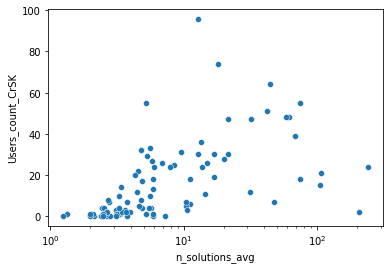

In [ ]:
splot = sns.scatterplot(data=Framesets_Info_df, x="n_solutions_avg", y="Users_count_CrSK")
splot.set(xscale="log")

In [14]:
Framesets_Info_df.columns

Index(['FramesetName', 'n_solutions_sum', 'n_questions', 'n_solutions_avg',
       'Select Only One', 'Multiple Select', 'T/F', 'Users_count_CrSK',
       'Sessions_count_CrSk', 'Users_count_Nrml', 'Sessions_count_Nrml',
       'Percentage_Users_Attempted_CrSk', 'Percentage_Users_Attempted_Nrml',
       'Percentage_Users_Out_of_All_CrSk', 'Percentage_Users_Out_of_All_Nrml',
       'Percentage_Sessions_CrSk', 'Percentage_Sessions_Nrml'],
      dtype='object')

R: 0.33252957008384326
P-value 0.0009933158781640838


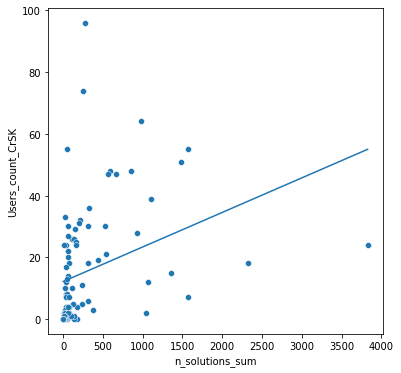

In [15]:
Y ="Users_count_CrSK"
X ="n_solutions_sum"
res = stats.linregress(Framesets_Info_df[X], Framesets_Info_df[Y])
rvalue, pvalue = stats.pearsonr(x=Framesets_Info_df[X], y=Framesets_Info_df[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=Framesets_Info_df, x=X, y=Y)
sns.lineplot(x=Framesets_Info_df[X], y=res.intercept + res.slope * Framesets_Info_df[X])
plt.show()

# Create TF_DF 

In [129]:
traces_1d = pd.read_csv("Traces_1D.csv")
Framesets_Questions_Info_Df = pd.read_csv("Framesets_Questions_Info.csv")
traces_1d.columns,Framesets_Questions_Info_Df.columns

(Index(['user_id', 'trace_number', 'curr_frameset_name', 'activity_name',
        'question_id', 'timestamp'],
       dtype='object'),
 Index(['FramesetName', 'QuestionName', 'QuestionType', 'n_choices',
        'n_solutions', 'QuestionNumber'],
       dtype='object'))

In [130]:
userIDs = traces_1d['user_id'].unique()
framesetNames =  Framesets_Questions_Info_Df['FramesetName'].unique()
Framesets_Questions_Info_Df.set_index(['FramesetName','QuestionNumber'],inplace=True)


In [132]:
TF_DF = pd.DataFrame(columns=framesetNames)

In [133]:
TF_DF['userID'] = userIDs
TF_DF.set_index(userIDs,inplace=True)
TF_DF.fillna(0,inplace=True)

In [135]:
for event in traces_1d.iterrows():
    activity_name = event[1][3]
    question_id = event[1][4]
    userID = event[1][0]
    framesetName = event[1][2] 
    try:
        if framesetName not in framesetNames:
            continue
        if activity_name=='X' and Framesets_Questions_Info_Df.loc[framesetName,question_id]['QuestionType']  =='T/F':
            TF_DF.at[userID,framesetName]+=1
    except Exception as inst:
        continue
        

In [141]:
TF_DF.to_csv("Wrong Attempts TF.csv")